# Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extracting Data From Files

In this section, we will extract data from files and store them in pandas Dataframes.

In [24]:
filenames = ["CPbl.a", "CPbr.a", "phylab3_05.a", "phylab3_05-1.a"]

df = {} # dictionary for storing the dataframes

for file in filenames:
       
    data = {
        "t": [],
        "x": [],
        "y": [],
        "z": [],
        "u(p)": [],
        "0.0": [],
        "0.00": [],
        "fN-used": []
    }
     
    f = open("sample_data/"+file, "r")
    headerLen = 10
    for l, line in enumerate(f):        
            if l >= headerLen:         
                part = line.split()
                data["t"].append(float(part[0]))
                data["x"].append(float(part[1]))
                data["y"].append(float(part[2]))
                data["z"].append(float(part[3]))
                data["u(p)"].append(float(part[4]))
                data["0.0"].append(float(part[5]))
                data["0.00"].append(float(part[6]))
                data["fN-used"].append(float(part[7]))

    for d in data:
        data[d] = np.array(data[d])
        
    temp = pd.DataFrame(data)
    df[file] = temp     
    print(file[:-2], "\n", temp, "\n")



CPbl 
               t      x      y    z  u(p)  0.0  0.00  fN-used
0           6.4 -150.3 -138.2 -7.9   3.1  0.0   0.0    125.0
1          11.1 -149.9 -138.4 -8.3   3.3  0.0   0.0    125.0
2          15.4 -150.2 -138.4 -8.7   3.8  0.0   0.0    125.0
3          19.8 -149.4 -138.2 -8.8   3.4  0.0   0.0    125.0
4          24.1 -149.3 -137.4 -9.1   3.5  0.0   0.0    125.0
...         ...    ...    ...  ...   ...  ...   ...      ...
70715  299967.1 -149.5 -138.1 -8.5   2.8  0.0   0.0    125.0
70716  299971.7 -149.6 -138.5 -8.3   3.2  0.0   0.0    125.0
70717  299975.8 -149.7 -138.6 -8.9   3.1  0.0   0.0    125.0
70718  299980.3 -149.3 -138.7 -8.6   3.1  0.0   0.0    125.0
70719  299984.7 -149.8 -138.4 -8.4   3.2  0.0   0.0    125.0

[70720 rows x 8 columns] 

CPbr 
               t      x      y     z  u(p)  0.0  0.00  fN-used
0           8.4  154.9 -142.7 -24.7   3.2  0.0   0.0    125.0
1          13.3  155.3 -143.6 -25.1   3.3  0.0   0.0    125.0
2          18.7  155.1 -143.9 -25.3   2.

# Plotting the Cartesian Coordinates

In this section, we plot the data obtained from each file in 3d coordinate system, assuming the axes are in the right order. 

The plotted data shows the flow pattern, which can provide some clues about the location of the axis of rotation

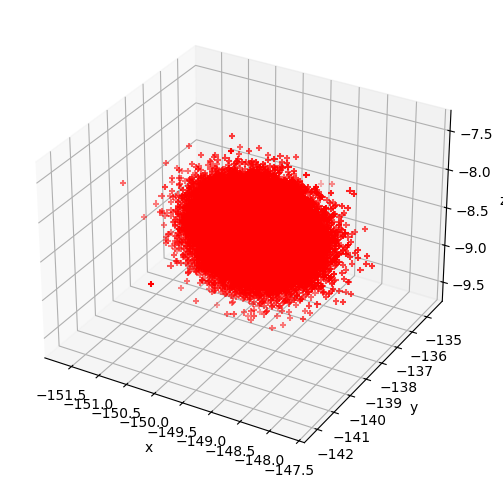

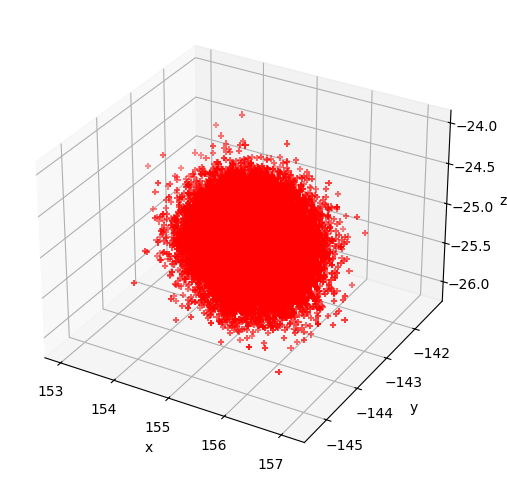

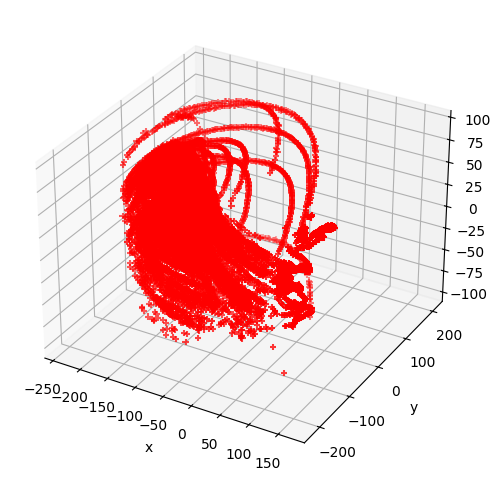

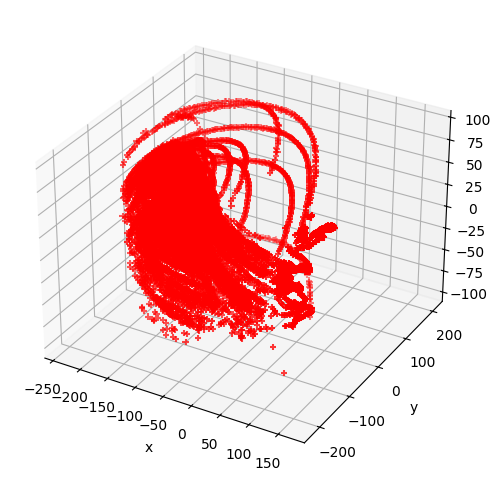

In [25]:

#data = df["CPbr.a"]
for d in df.values():
    x_data = d["x"]
    y_data = d["y"]
    z_data = d["z"]

    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D scatter plot
    ax.scatter(x_data, y_data, z_data, c='r', marker='+')

    # Set labels for the axes
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Show the plot
    plt.show()


# Converting from cartesian to cylindrical coordinates

In [26]:
rotation_axis = [0,0,0]         # assuming axis of rotation is found to be at the origin
cyli_coordinates = {}

for key, value in df.items():
    temp = {}  

    # ρ = sqrt((x - x_rot)^2 + (y - y_rot)^2)
    r_distance = np.sqrt(np.power(value["x"] - rotation_axis[0], 2) 
                + np.power(value["y"] - rotation_axis[1], 2))

    # θ = atan2(y - y_rot, x - x_rot)
    theta = np.arctan2(value["y"] - rotation_axis[1], value["x"] - rotation_axis[0])

    temp["r"] = r_distance
    temp["theta"] = theta
    temp["z"] = value["z"]
    cyli_coordinates[key] = pd.DataFrame(temp)
    
    print(key[:-2], "\n", pd.DataFrame(temp), "\n")

CPbl 
                 r     theta    z
0      204.179651 -2.398111 -7.9
1      204.021004 -2.396062 -8.3
2      204.241524 -2.397059 -8.7
3      203.518058 -2.395118 -8.8
4      202.902070 -2.397677 -9.1
...           ...       ...  ...
70715  203.523610 -2.395812 -8.5
70716  203.868610 -2.394704 -8.3
70717  204.009926 -2.394677 -8.9
70718  203.784641 -2.392983 -8.6
70719  203.947542 -2.395730 -8.4

[70720 rows x 3 columns] 

CPbr 
                 r     theta     z
0      210.611728 -0.744426 -24.7
1      211.516075 -0.746275 -25.1
2      211.573202 -0.747957 -25.3
3      211.086641 -0.746865 -25.3
4      211.589508 -0.745954 -24.4
...           ...       ...   ...
50825  211.866609 -0.746673 -25.4
50826  211.997170 -0.748032 -24.9
50827  211.499905 -0.748279 -25.1
50828  211.453825 -0.745259 -25.2
50829  210.929396 -0.748850 -25.2

[50830 rows x 3 columns] 

phylab3_05 
                 r     theta     z
0      197.347663 -2.063228  46.3
1      195.615388 -2.091401  45.0
2      198.

# Plotting the Cylindrical Coordinates

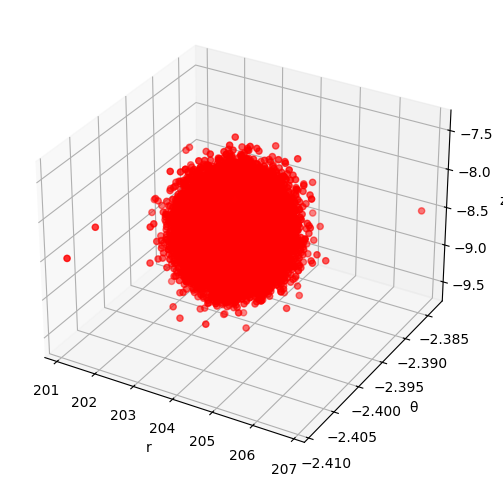

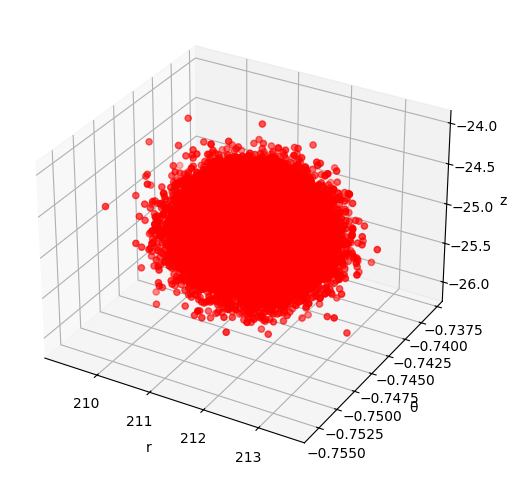

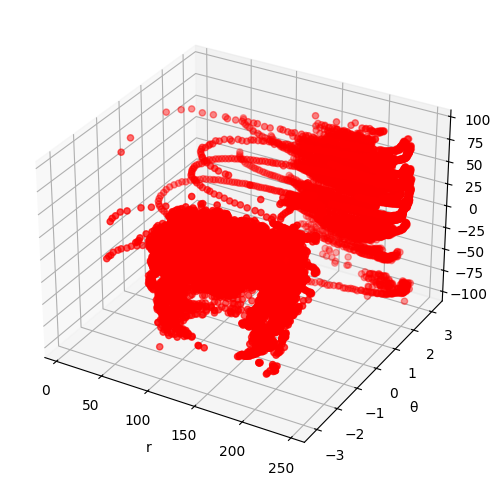

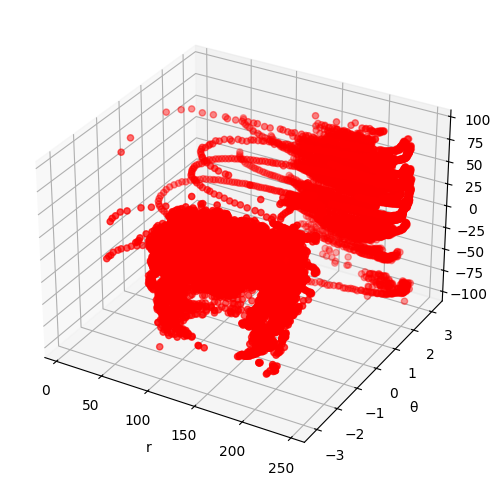

In [29]:
for d in cyli_coordinates.values():
    x_data = d["r"]
    y_data = d["theta"]
    z_data = d["z"]

    # Create a figure and a 3D axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D scatter plot
    ax.scatter(x_data, y_data, z_data, c='r', marker='o')

    # Set labels for the axes
    ax.set_xlabel('r')
    ax.set_ylabel('θ')
    ax.set_zlabel('z')

    # Show the plot
    plt.show()